In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Beasiswa (1).csv')
df

,Mahasiswa,IPK,Tingkat Kemiskinan,Beasiswa/Tidak
0,1,0.7,0.7,0
1,2,1.2,1.1,0
2,3,0.6,1.6,0
3,4,2.4,3.1,1
4,5,3.0,2.4,1
5,6,3.4,3.8,1
6,7,2.6,3.4,1
7,8,0.6,1.6,0
8,9,2.4,3.1,1
9,10,2.6,3.4,1


In [ ]:
x = df.iloc[:,[1,2]].values
y = df.iloc[:,-1].values

In [ ]:
print(x)

[[0.7 0.7]
 [1.2 1.1]
 [0.6 1.6]
 [2.4 3.1]
 [3.  2.4]
 [3.4 3.8]
 [2.6 3.4]
 [0.6 1.6]
 [2.4 3.1]
 [2.6 3.4]
 [2.5 3.4]]


In [ ]:
print(y)

[0 0 0 1 1 1 1 0 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.3, random_state =0)
print(x_train)

[[2.6 3.4]
 [1.2 1.1]
 [0.6 1.6]
 [2.4 3.1]
 [2.4 3.1]
 [0.7 0.7]
 [3.4 3.8]]


In [ ]:
len(x_train)

7

In [ ]:
len(x_test)

4

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)


In [ ]:
print(x_train)

[[ 0.70710678  0.87418084]
 [-0.70710678 -1.13643509]
 [-1.31319831 -0.69934467]
 [ 0.50507627  0.61192659]
 [ 0.50507627  0.61192659]
 [-1.21218305 -1.48610743]
 [ 1.51522882  1.22385317]]


In [ ]:
print(x_test)

[[ 1.11116780e+00  3.88214278e-16]
 [ 7.07106781e-01  8.74180839e-01]
 [-1.31319831e+00 -6.99344671e-01]
 [ 6.06091527e-01  8.74180839e-01]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1 0]
 [0 3]]


In [ ]:
from sklearn.metrics import classification_report

akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



<ipython-input-38-036ff2cedfc1>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red','green'))(i),


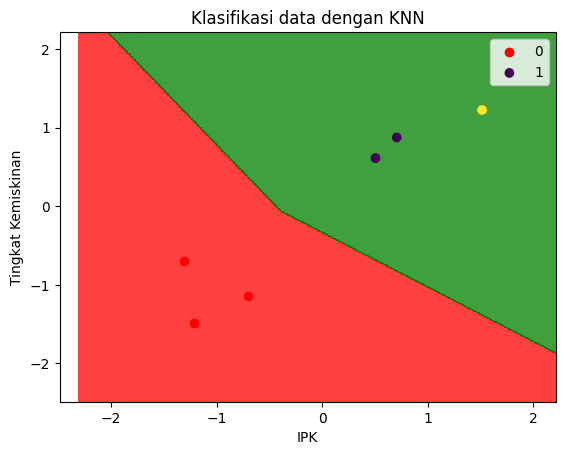

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

x1,x2 = np.meshgrid(np.arange(start =x_set[:,0].min() - 1, stop=x_set[:,0].max()+ 1, step =0.01),
                    np.arange(start =x_set[:,1].min() - 1, stop=x_set[:,1].max()+ 1, step =0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red','green'))(i),
              label = str(j))

plt.title('Klasifikasi data dengan KNN')
plt.xlabel('IPK')
plt.ylabel('Tingkat Kemiskinan')
plt.legend()

plt.show()